# 第3部　記述統計

## 3章　度数分布

### 実装：分析の準備

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd

### 実装：度数分布

In [2]:
# 表示設定(書籍本文のレイアウトと合わせるためであり、必須ではありません)
np.set_printoptions(linewidth=60)
pd.set_option('display.width', 60)

#### カテゴリーデータの度数分布

In [3]:
# Google Colabの場合、リポジトリをクローン
import os
import subprocess
if not os.path.exists('book-python-stats-2nd'):
    subprocess.run(['git', 'clone', 'https://github.com/PerceptronTechnology/book-python-stats-2nd.git'])

# データの読み込み
category_data = pd.read_csv('book-python-stats-2nd/book-data/3-3-1-fish-species.csv')
print(category_data)

  species
0       A
1       A
2       A
3       B
4       B
5       B
6       B
7       B
8       B
9       B


In [4]:
# カテゴリーデータの度数分布
category_data.species.value_counts(sort=False)

species
A    3
B    7
Name: count, dtype: int64

#### 数量データの度数分布

In [5]:
# データの読み込み
numeric_data = pd.read_csv('3-3-2-fish-length.csv')
print(numeric_data)

   length
0    1.91
1    1.21
2    2.28
3    1.01
4    1.00
5    4.50
6    1.96
7    0.72
8    3.67
9    2.55


In [6]:
# 数量データの度数分布（うまくいかない例）
numeric_data.length.value_counts()

length
1.91    1
1.21    1
2.28    1
1.01    1
1.00    1
4.50    1
1.96    1
0.72    1
3.67    1
2.55    1
Name: count, dtype: int64

In [7]:
# 数量データの度数分布(3区分)
numeric_data.length.value_counts(bins=3)

(0.715, 1.98]    6
(1.98, 3.24]     2
(3.24, 4.5]      2
Name: count, dtype: int64

In [8]:
# 階級の上限と下限
np.arange(0, 6, 1)

array([0, 1, 2, 3, 4, 5])

In [9]:
# 数量データの度数分布(階級の上限と下限を指定)
freq = numeric_data.length.value_counts(
    bins=np.arange(0, 6, 1), sort=False)
freq

(-0.001, 1.0]    2
(1.0, 2.0]       4
(2.0, 3.0]       2
(3.0, 4.0]       1
(4.0, 5.0]       1
Name: count, dtype: int64

#### numpyの関数を使う

In [10]:
# 数量データの度数分布(3区分)
np.histogram(numeric_data.length, bins=3)

(array([6, 2, 2]), array([0.72, 1.98, 3.24, 4.5 ]))

In [11]:
# 参考：度数だけを取得した結果(書籍には載っていないコードです)
np.histogram(numeric_data.length, bins=3)[0]

array([6, 2, 2])

In [12]:
# 数量データの度数分布(階級の上限と下限を指定)
# 下限を含み、上限を含まないので注意
np.histogram(numeric_data.length, bins=np.arange(0, 6, 1))

(array([1, 5, 2, 1, 1]), array([0, 1, 2, 3, 4, 5]))

### 実装：相対度数分布・累積度数分布

#### 相対度数分布

In [13]:
# 相対度数分布
rel_freq = freq / sum(freq)
rel_freq

(-0.001, 1.0]    0.2
(1.0, 2.0]       0.4
(2.0, 3.0]       0.2
(3.0, 4.0]       0.1
(4.0, 5.0]       0.1
Name: count, dtype: float64

In [16]:
# value_counts関数の設定を変える
numeric_data.length.value_counts(bins=np.arange(0, 6, 1), sort=False, normalize=True)

(-0.001, 1.0]    0.2
(1.0, 2.0]       0.4
(2.0, 3.0]       0.2
(3.0, 4.0]       0.1
(4.0, 5.0]       0.1
Name: proportion, dtype: float64

In [17]:
# np.hinstogram関数の設定を変える
np.histogram(numeric_data.length, bins=np.arange(0, 6, 1),
             density=True)

(array([0.1, 0.5, 0.2, 0.1, 0.1]), array([0, 1, 2, 3, 4, 5]))

#### 累積度数分布

In [18]:
# 累積度数分布
freq.cumsum()

(-0.001, 1.0]     2
(1.0, 2.0]        6
(2.0, 3.0]        8
(3.0, 4.0]        9
(4.0, 5.0]       10
Name: count, dtype: int64

In [19]:
freq_np = np.histogram(numeric_data.length, 
                       bins=np.arange(0, 6, 1))[0]
np.cumsum(freq_np)

array([ 1,  6,  8,  9, 10])

In [20]:
# 累積相対度数分布
rel_freq.cumsum()

(-0.001, 1.0]    0.2
(1.0, 2.0]       0.6
(2.0, 3.0]       0.8
(3.0, 4.0]       0.9
(4.0, 5.0]       1.0
Name: count, dtype: float64

### グラフ描画とmatplotlib・seaborn

In [23]:
# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [24]:
# 表示設定(書籍本文のレイアウトと合わせるためであり、必須ではありません)
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

### 実装：ヒストグラム

#### matplotlibを使う方法(参考)

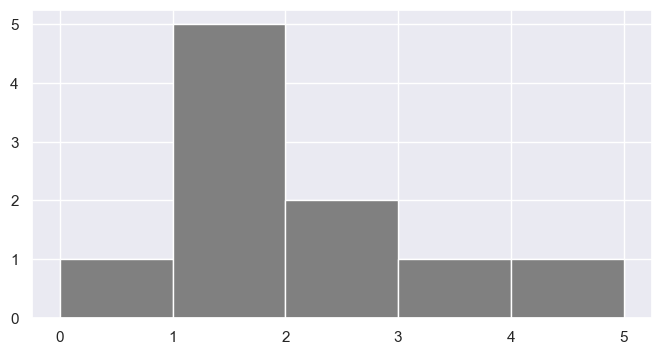

In [25]:
# 参考：matplotlibを使ったヒストグラム(書籍には載っていないコードです)
hist = plt.hist(x='length', data=numeric_data, 
                bins=np.arange(0, 6, 1), color='gray')

#### seabornを使う方法

<Axes: xlabel='length', ylabel='Count'>

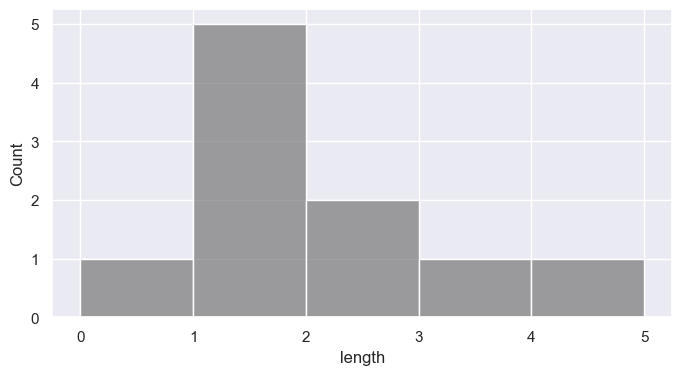

In [26]:
sns.histplot(x='length', data=numeric_data, color='gray',
             bins=np.arange(0, 6, 1))

<Axes: xlabel='length', ylabel='Density'>

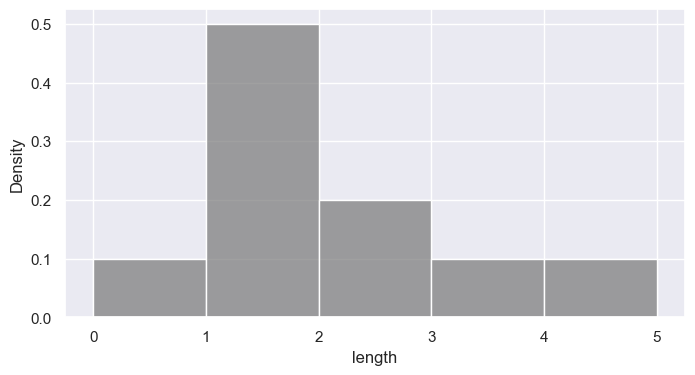

In [27]:
# 柱の面積を相対度数にする
sns.histplot(x='length', data=numeric_data, color='gray',
             bins=np.arange(0, 6, 1), stat='density')

### 実装：階級の幅が異なるヒストグラム

In [28]:
# np.hinstogram関数の設定を変える
np.histogram(numeric_data.length, bins=np.array([0, 1, 2, 5]),
             density=True)

(array([0.1       , 0.5       , 0.13333333]), array([0, 1, 2, 5]))

<Axes: xlabel='length', ylabel='Density'>

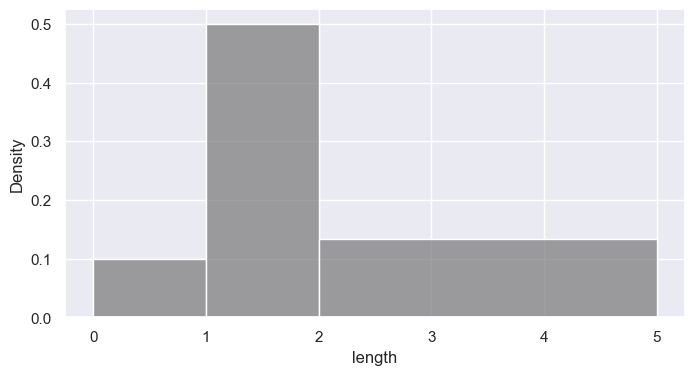

In [29]:
# 階級の幅を変える
sns.histplot(x='length', data=numeric_data, color='gray',
             bins=np.array([0, 1, 2, 5]), stat='density')

### 実装：カーネル密度推定によるヒストグラム平滑化

<Axes: xlabel='length', ylabel='Density'>

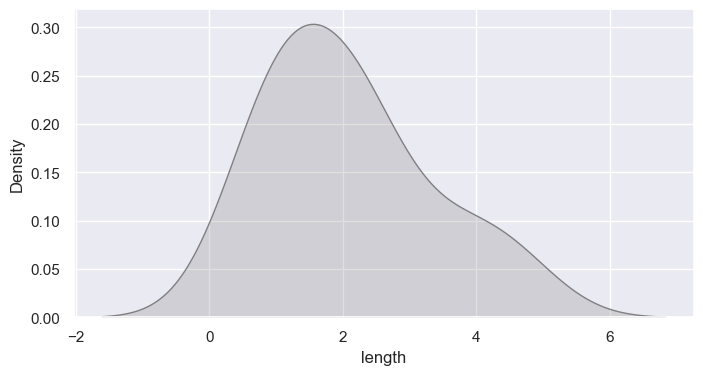

In [30]:
sns.kdeplot(numeric_data.length, fill=True, color='gray')

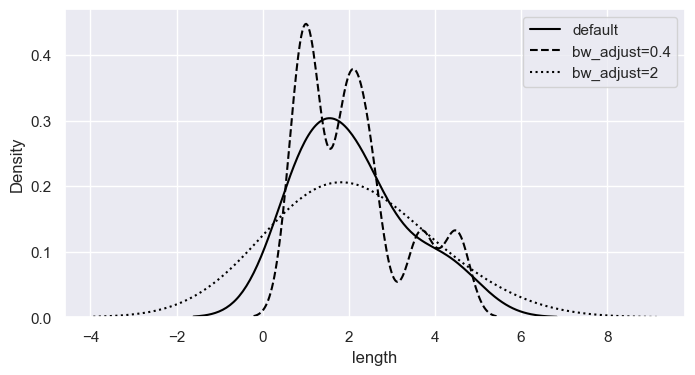

In [31]:
# バンド幅を変えた3種類のカーネル密度推定の結果
sns.kdeplot(numeric_data.length, 
            color='black', label='default')
sns.kdeplot(numeric_data.length, 
            color='black', bw_adjust=0.4, 
            linestyle='dashed', label='bw_adjust=0.4')
sns.kdeplot(numeric_data.length, 
            color='black', bw_adjust=2, 
            linestyle='dotted', label='bw_adjust=2')

plt.legend() # 凡例